# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

#basis = 'sto-3g'

In [4]:
import pyscf
from pyscf import gto, cc

def obtain_PES_cisd(molstr, bond_lengths, basis):
    
    PES = np.zeros(len(bond_lengths))
    for i in range(len(bond_lengths)):
        mol = gto.Mole()
        mol.atom = get_molecular_data(molstr, bond_lengths[i], xyz_format=False)
        mol.basis = basis
        mol.build()

        mf = mol.HF().run()
        mycc = mf.CISD().run()

        PES[i] = mycc.e_tot

    return PES

## H<sub>2</sub>

In [90]:
bond_lengths = np.linspace(0.3,2.6,15)

In [91]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

converged SCF energy = -0.593827758535727
E = -0.6018037107656871 Eh
converged SCF energy = -1.0057603262198
E = -1.0170077771306705 Eh
converged SCF energy = -1.10896782983475
E = -1.1251042150883166 Eh
converged SCF energy = -1.11181510951713
E = -1.1347660694646453 Eh
converged SCF energy = -1.07777235059489
E = -1.1099340348291356 Eh
converged SCF energy = -1.02990908563048
E = -1.0743680156814965 Eh
converged SCF energy = -0.977677491701263
E = -1.0381706056718054 Eh
converged SCF energy = -0.926017175738151
E = -1.0064869318291216 Eh
converged SCF energy = -0.877707132773868
E = -0.9815937077228167 Eh
converged SCF energy = -0.834145169219331
E = -0.963685252321653 Eh
converged SCF energy = -0.795861398207394
E = -0.9516997975992478 Eh
converged SCF energy = -0.762848137620963
E = -0.9441160890818658 Eh
converged SCF energy = -0.734769171731397
E = -0.9395068436631838 Eh
converged SCF energy = -0.711116294209069
E = -0.9367800530464581 Eh
converged SCF energy = -0.691327561197378

In [92]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis, method='hf')

converged SCF energy = -0.593827758535727
E = -0.5938277585357277 Eh
converged SCF energy = -1.0057603262198
E = -1.0057603262198032 Eh
converged SCF energy = -1.10896782983475
E = -1.1089678298347458 Eh
converged SCF energy = -1.11181510951713
E = -1.1118151095171338 Eh
converged SCF energy = -1.07777235059489
E = -1.0777723505948869 Eh
converged SCF energy = -1.02990908563048
E = -1.0299090856304793 Eh
converged SCF energy = -0.977677491701263
E = -0.977677491701263 Eh
converged SCF energy = -0.926017175738151
E = -0.9260171757381511 Eh
converged SCF energy = -0.877707132773868
E = -0.8777071327738677 Eh
converged SCF energy = -0.834145169219331
E = -0.8341451692193307 Eh
converged SCF energy = -0.795861398207394
E = -0.7958613982073939 Eh
converged SCF energy = -0.762848137620963
E = -0.7628481376209626 Eh
converged SCF energy = -0.734769171731397
E = -0.7347691717313968 Eh
converged SCF energy = -0.711116294209069
E = -0.7111162942090686 Eh
converged SCF energy = -0.691327561197378

In [93]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis, method='ccsd')

converged SCF energy = -0.593827758535727
E = -0.6018037177047955 Eh
converged SCF energy = -1.0057603262198
E = -1.0170078109864513 Eh
converged SCF energy = -1.10896782983475
E = -1.1251043063250517 Eh
converged SCF energy = -1.11181510951713
E = -1.1347662612214748 Eh
converged SCF energy = -1.07777235059489
E = -1.1099340348358913 Eh
converged SCF energy = -1.02990908563048
E = -1.0743680157481643 Eh
converged SCF energy = -0.977677491701263
E = -1.0381706056996811 Eh
converged SCF energy = -0.926017175738151
E = -1.006486931977208 Eh
converged SCF energy = -0.877707132773868
E = -0.9815937082504602 Eh
converged SCF energy = -0.834145169219331
E = -0.9636852535394416 Eh
converged SCF energy = -0.795861398207394
E = -0.9516997992595515 Eh
converged SCF energy = -0.762848137620963
E = -0.9441160900830426 Eh
converged SCF energy = -0.734769171731397
E = -0.9395068437898431 Eh
converged SCF energy = -0.711116294209069
E = -0.9367800530499719 Eh
converged SCF energy = -0.691327561197378

In [94]:
#Run CISD
CISD_PES = obtain_PES_cisd('h2', bond_lengths, basis)

converged SCF energy = -0.593827758535727
E(RCISD) = -0.6018037107656865  E_corr = -0.007975952229959228
converged SCF energy = -1.0057603262026
E(RCISD) = -1.017007777113113  E_corr = -0.01124745091051656
converged SCF energy = -1.10896782982838
E(RCISD) = -1.125104215080939  E_corr = -0.01613638525256272
converged SCF energy = -1.11181510952273
E(RCISD) = -1.134766069468179  E_corr = -0.02295095994544645
converged SCF energy = -1.07777235058363
E(RCISD) = -1.109934034820646  E_corr = -0.032161684237021
converged SCF energy = -1.02990908562159
E(RCISD) = -1.074368015675057  E_corr = -0.04445893005346647
converged SCF energy = -0.977677491696692
E(RCISD) = -1.038170605668802  E_corr = -0.06049311397211003
converged SCF energy = -0.926017175738151
E(RCISD) = -1.006486931829122  E_corr = -0.08046975609097082
converged SCF energy = -0.877707132777875
E(RCISD) = -0.9815937077246695  E_corr = -0.1038865749467943
converged SCF energy = -0.834145169226453
E(RCISD) = -0.963685252324211  E_corr

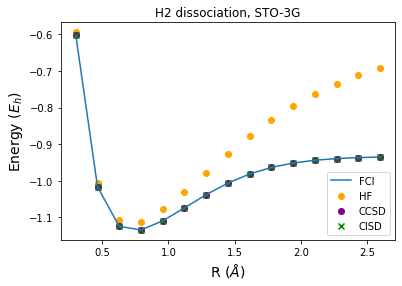

In [95]:
#Plot H2 PESs
plt.title('H2 dissociation, STO-3G')
plt.xlabel(r'R ($\AA$)',fontsize=14)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green', marker='x')
plt.legend()
plt.savefig('h2PES.png')

## H<sub>2</sub>O symmetric O-H dissociation

In [77]:
bond_lengths = np.linspace(0.5,2.7,16)

In [78]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

converged SCF energy = -73.1294523897688
E = -73.14266064419186 Eh
converged SCF energy = -74.4038072136675
E = -74.42488806699633 Eh
converged SCF energy = -74.8405107876161
E = -74.87223207670559 Eh
converged SCF energy = -74.9584269120699
E = -75.00520769545702 Eh
converged SCF energy = -74.9444239939003
E = -75.01244511917604 Eh
converged SCF energy = -74.874155488534
E = -74.97090510207308 Eh
converged SCF energy = -74.782178857091
E = -74.91569532953456 Eh
converged SCF energy = -74.6842889762284
E = -74.86259644261854 Eh
converged SCF energy = -74.5880507303321
E = -74.81856626154436 Eh
converged SCF energy = -74.4979658003573
E = -74.78627575763318 Eh
converged SCF energy = -74.4171208092393
E = -74.76524339485054 Eh
converged SCF energy = -74.3457863823244
E = -74.75281932182382 Eh
converged SCF energy = -74.2854768042807
E = -74.74588327328468 Eh
converged SCF energy = -74.2347492688521
E = -74.74206972964346 Eh
converged SCF energy = -74.276283280256
E = -74.73995981164887 E

In [79]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis, method='hf')

converged SCF energy = -73.1294523897688
E = -73.1294523897688 Eh
converged SCF energy = -74.4038072136675
E = -74.40380721366749 Eh
converged SCF energy = -74.8405107876161
E = -74.8405107876174 Eh
converged SCF energy = -74.9584269120699
E = -74.95842691206997 Eh
converged SCF energy = -74.9444239939003
E = -74.9444239939003 Eh
converged SCF energy = -74.874155488534
E = -74.87415548853399 Eh
converged SCF energy = -74.782178857091
E = -74.78217885709097 Eh
converged SCF energy = -74.6842889762284
E = -74.68428897622866 Eh
converged SCF energy = -74.5880507303321
E = -74.58805073033204 Eh
converged SCF energy = -74.4979658003573
E = -74.49796580033777 Eh
converged SCF energy = -74.4171208092393
E = -74.41712080925348 Eh
converged SCF energy = -74.3457863823244
E = -74.34578638338311 Eh
converged SCF energy = -74.2854768042807
E = -74.28547680421384 Eh
converged SCF energy = -74.2347492688521
E = -74.2347492669673 Eh
converged SCF energy = -74.276283280256
E = -74.27628328025602 Eh
SC

In [80]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis, method='ccsd')

converged SCF energy = -73.1294523897688
E = -73.14264199013866 Eh
converged SCF energy = -74.4038072136675
E = -74.42485390357585 Eh
converged SCF energy = -74.8405107876161
E = -74.87216882400047 Eh
converged SCF energy = -74.9584269120699
E = -75.00509279089931 Eh
converged SCF energy = -74.9444239939003
E = -75.01222646144976 Eh
converged SCF energy = -74.874155488534
E = -74.97046949951124 Eh
converged SCF energy = -74.782178857091
E = -74.91492028843297 Eh
converged SCF energy = -74.6842889762284
E = -74.8616461893924 Eh
converged SCF energy = -74.5880507303321
E = -74.81867046575337 Eh
converged SCF energy = -74.4979658003573
E = -74.79077060035095 Eh
converged SCF energy = -74.4171208092393
E = -74.77682469402923 Eh
converged SCF energy = -74.3457863823244
E = -74.77765102697164 Eh
converged SCF energy = -74.2854768042807
E = -74.78046726233683 Eh
converged SCF energy = -74.2347492688521
E = -74.78389510808155 Eh
converged SCF energy = -74.276283280256
E = -74.64196261998856 Eh

In [81]:
#Run CISD
CISD_PES = obtain_PES_cisd('h2o', bond_lengths, basis)

converged SCF energy = -73.129452389525
E(RCISD) = -73.14274671598841  E_corr = -0.01329432646338511
converged SCF energy = -74.403807213596
E(RCISD) = -74.42491885983789  E_corr = -0.02111164624184704
converged SCF energy = -74.8405107875973
E(RCISD) = -74.87209344623629  E_corr = -0.03158265863902172
converged SCF energy = -74.9584269120653
E(RCISD) = -75.00466605744535  E_corr = -0.04623914538002514
converged SCF energy = -74.9444239938843
E(RCISD) = -75.01090200260734  E_corr = -0.06647800872302265
converged SCF energy = -74.8741554885028
E(RCISD) = -74.96703013690804  E_corr = -0.09287464840526738
converged SCF energy = -74.7821788571095
E(RCISD) = -74.90710620691588  E_corr = -0.1249273498064016
converged SCF energy = -74.6842889762441
E(RCISD) = -74.84581559503829  E_corr = -0.1615266187942286
converged SCF energy = -74.5880507303445
E(RCISD) = -74.78952076700848  E_corr = -0.2014700366640193
converged SCF energy = -74.4979658003666
E(RCISD) = -74.74170774763557  E_corr = -0.243

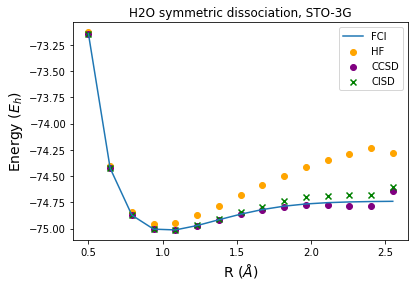

In [83]:
#Plot H2O PESs
plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel(r'R ($\AA$)',fontsize=14)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths[:-1], FCI_PES[:-1], label='FCI')
plt.scatter(bond_lengths[:-1], HF_PES[:-1], label='HF', color='orange')
plt.scatter(bond_lengths[:-1], CCSD_PES[:-1], label='CCSD', color='purple')
plt.scatter(bond_lengths[:-1], CISD_PES[:-1], label='CISD', color='green', marker='x')
plt.legend()
plt.savefig('h2oPES.png')

<img src="figs/testimage.png">

In [3]:
def plotPES(molstr, gpi, gpf, gpstep, titlestr, geomstr):
    bond_lengths = np.linspace(gpi,gpf,gpstep)
    
    FCI_PES = obtain_PES(molstr, bond_lengths, basis, method='fci')
    HF_PES = obtain_PES(molstr, bond_lengths, basis, method='hf')
    CCSD_PES = obtain_PES(molstr, bond_lengths, basis, method='ccsd')
    CISD_PES = obtain_PES_cisd(molstr, bond_lengths, basis)
    
    plt.title(titlestr+', STO-3G')
    plt.xlabel(r''+geomstr,fontsize=14)
    plt.ylabel(r'Energy ($E_h$)',fontsize=14)
    
    plt.plot(bond_lengths, FCI_PES, label='FCI')
    plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
    plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
    plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green', marker='x')
    plt.legend()
    plt.savefig(molstr+'PES.png')
    
    return FCI_PES, HF_PES, CCSD_PES, CISD_PES

converged SCF energy = -7.48594487054729
E = -7.503999888792947 Eh
converged SCF energy = -7.65180096403893
E = -7.669220425771165 Eh
converged SCF energy = -7.7521280996913
E = -7.768888987795291 Eh
converged SCF energy = -7.81108824172071
E = -7.827543959588625 Eh
converged SCF energy = -7.84372347567863
E = -7.860402054120986 Eh
converged SCF energy = -7.85924266372177
E = -7.87674671394065 Eh
converged SCF energy = -7.8633796323259
E = -7.882346792005599 Eh
converged SCF energy = -7.85985170433424
E = -7.880946728933687 Eh
converged SCF energy = -7.85115857262827
E = -7.875080003893763 Eh
converged SCF energy = -7.8390202625196
E = -7.866512594262566 Eh
converged SCF energy = -7.82463616611775
E = -7.856502899886746 Eh
converged SCF energy = -7.80885162342906
E = -7.845965459822449 Eh
converged SCF energy = -7.79227187055305
E = -7.835576250493461 Eh
converged SCF energy = -7.77534235231831
E = -7.825835227962582 Eh
converged SCF energy = -7.75840439904961
E = -7.817094209493674 Eh

(array([-7.50399989, -7.66922043, -7.76888899, -7.82754396, -7.86040205,
        -7.87674671, -7.88234679, -7.88094673, -7.87508   , -7.86651259,
        -7.8565029 , -7.84596546, -7.83557625, -7.82583523, -7.81709421]),
 array([-7.48594487, -7.65180096, -7.7521281 , -7.81108824, -7.84372348,
        -7.85924266, -7.86337963, -7.8598517 , -7.85115857, -7.83902026,
        -7.82463617, -7.80885162, -7.79227187, -7.77534235, -7.7584044 ]),
 array([-7.50399989, -7.66922043, -7.76888899, -7.82754395, -7.86040205,
        -7.87674671, -7.88234679, -7.88094673, -7.87508   , -7.86651259,
        -7.85650288, -7.84596546, -7.83557625, -7.82583523, -7.81709421]),
 array([-7.50503493, -7.66992065, -7.76935757, -7.82786387, -7.8606448 ,
        -7.87696066, -7.88255746, -7.88116412, -7.87530614, -7.86674639,
        -7.85674254, -7.84620933, -7.83582322, -7.82608452, -7.81734514]))

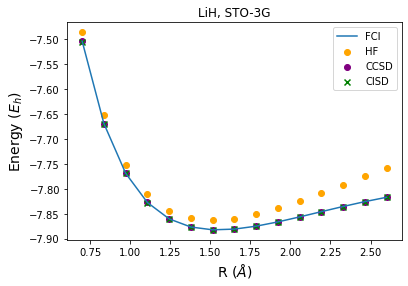

In [9]:
# LiH
plotPES('lih',0.7,3.5,15,'LiH','R ($\AA$)')

converged SCF energy = -105.697412212736
E = -105.76477992786926 Eh
converged SCF energy = -106.629498501663
E = -106.71343613490927 Eh
converged SCF energy = -107.13522911565
E = -107.23778378366097 Eh
converged SCF energy = -107.385949963195
E = -107.51006873394269 Eh
converged SCF energy = -107.485623465598
E = -107.63468773306917 Eh
converged SCF energy = -107.497723269674
E = -107.67525059052711 Eh
converged SCF energy = -107.46073362216
E = -107.67021208078154 Eh
converged SCF energy = -107.39763209969
E = -107.64248667335121 Eh
converged SCF energy = -107.321862235985
E = -107.60543135286066 Eh
converged SCF energy = -107.241164238016
E = -107.56694555601618 Eh
converged SCF energy = -107.160015475747
E = -107.53174558968902 Eh
converged SCF energy = -107.081098046621
E = -107.50256719687252 Eh
converged SCF energy = -107.006089304762
E = -107.48048779771547 Eh
converged SCF energy = -106.936033315463
E = -107.46511799866917 Eh
converged SCF energy = -106.871504045608
E = -107.4

(array([-105.76477993, -106.71343613, -107.23778378, -107.51006873,
        -107.63468773, -107.67525059, -107.67021208, -107.64248667,
        -107.60543135, -107.56694556, -107.53174559, -107.5025672 ,
        -107.4804878 , -107.465118  , -107.45513895]),
 array([-105.69741221, -106.6294985 , -107.13522912, -107.38594996,
        -107.48562347, -107.49772327, -107.46073362, -107.3976321 ,
        -107.32186224, -107.24116424, -107.16001548, -107.08109805,
        -107.0060893 , -106.93603332, -106.87150405]),
 array([-105.76403518, -106.71233745, -107.23618076, -107.50771397,
        -107.63120708, -107.67013527, -107.66287541, -107.6324533 ,
        -107.59274478, -107.55297693, -107.52051436, -107.50237892,
        -107.50483273, -107.52737405, -107.55698714]),
 array([-105.76322725, -106.71076713, -107.23341606, -107.50311715,
        -107.62390272, -107.65899012, -107.6464691 , -107.60894471,
        -107.55964123, -107.50630476, -107.45360068, -107.40435209,
        -107.359954

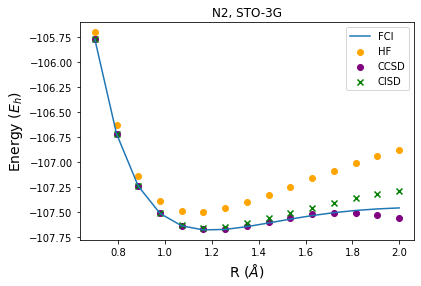

In [10]:
# N_2
plotPES('n2',0.7,2.0,15,'N2','R ($\AA$)')

converged SCF energy = -1.21435082088611
E = -1.2303992535610213 Eh
converged SCF energy = -1.79485451842254
E = -1.8142968742727001 Eh
converged SCF energy = -2.06725921436191
E = -2.0910653313247676 Eh
converged SCF energy = -2.18979444991553
E = -2.2190102615033895 Eh
converged SCF energy = -2.23197126999915
E = -2.2677340039997884 Eh
converged SCF energy = -2.22927244227699
E = -2.272824869535521 Eh
converged SCF energy = -2.20130062179891
E = -2.254024048633672 Eh
converged SCF energy = -2.15907337077447
E = -2.22253097538864 Eh
converged SCF energy = -2.1088556966568
E = -2.184817067654245 Eh
converged SCF energy = -2.05441285326005
E = -2.1448370265679806 Eh
converged SCF energy = -1.99822019800551
E = -2.1051935950268335 Eh
converged SCF energy = -1.94201868667331
E = -2.06765814243447 Eh
converged SCF energy = -1.8870498878166
E = -2.033385829696675 Eh
converged SCF energy = -1.83417400833163
E = -2.003029363453713 Eh
converged SCF energy = -1.78395437767631
E = -1.97683450275

converged SCF energy = -1.51872747579745
E(RCISD) = -1.85623499641387  E_corr = -0.3375075206164204
converged SCF energy = -1.49219951365743
E(RCISD) = -1.85915152549867  E_corr = -0.3669520118412435
converged SCF energy = -1.46794882975373
E(RCISD) = -1.861579027247588  E_corr = -0.3936301974938585
converged SCF energy = -1.44574766000701
E(RCISD) = -1.86368342949873  E_corr = -0.4179357694917212
converged SCF energy = -1.42536540451532
E(RCISD) = -1.865609219055703  E_corr = -0.4402438145403795
converged SCF energy = -1.41474235068972
E(RCISD) = -1.866651337820255  E_corr = -0.4519089871305392
converged SCF energy = -1.43421446663892
E(RCISD) = -1.864766672966206  E_corr = -0.430552206327282
converged SCF energy = -1.45537653671489
E(RCISD) = -1.862778413648977  E_corr = -0.4074018769340906
converged SCF energy = -1.47846025657161
E(RCISD) = -1.860549268543099  E_corr = -0.3820890119714928


(array([-1.23039925, -1.81429687, -2.09106533, -2.21901026, -2.267734  ,
        -2.27282487, -2.25402405, -2.22253098, -2.18481707, -2.14483703,
        -2.1051936 , -2.06765814, -2.03338583, -2.00302936, -1.9768345 ,
        -1.95473632, -1.9364534 , -1.92157347, -1.90962489, -1.90013117,
        -1.89264821, -1.88678701, -1.8822275 , -1.8787322 , -1.87617511,
        -1.87460144, -1.87423339, -1.87516769, -1.87719771, -1.88016547]),
 array([-1.21435082, -1.79485452, -2.06725921, -2.18979445, -2.23197127,
        -2.22927244, -2.20130062, -2.15907337, -2.1088557 , -2.05441285,
        -1.9982202 , -1.94201869, -1.88704989, -1.83417401, -1.78395438,
        -1.73672842, -1.69266566, -1.65181217, -1.61412367, -1.57949009,
        -1.54775442, -1.51872748, -1.49219951, -1.46794883, -1.44574766,
        -1.4253654 , -1.41474235, -1.43421447, -1.45537654, -1.47846026]),
 array([-1.23039924, -1.81429687, -2.09106531, -2.21901022, -2.26773394,
        -2.27282476, -2.25402407, -2.22253083, 

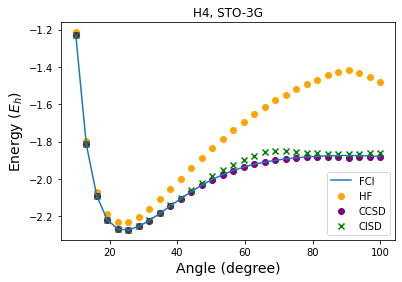

In [18]:
# H_4
plotPES('h4',10.0,100.0,30,'H4','Angle (degree)')

# Check separability/size-consistency

In [17]:
r0 = 0.741 #H2 equilibrium bond length
HF_PES = obtain_PES('h2', [r0], basis, method='hf')
HF_PES2 = obtain_PES('h2x2', [100], basis, method='hf')
CCSD_PES = obtain_PES('h2', [r0], basis, method='ccsd')
CCSD_PES2 = obtain_PES('h2x2', [100], basis, method='ccsd')
CISD_PES = obtain_PES_cisd('h2', [r0], basis)
CISD_PES2 = obtain_PES_cisd('h2x2', [100], basis)

pes = np.vstack((HF_PES, CCSD_PES, CISD_PES))
pes2 = np.vstack((HF_PES2, CCSD_PES2, CISD_PES2))

converged SCF energy = -1.1167061372361
E = -1.1167061372361042 Eh
converged SCF energy = -2.23341227446985
E = -2.2334122744698566 Eh
converged SCF energy = -1.1167061372361
E = -1.1372745709766414 Eh
converged SCF energy = -2.23341227446985
E = -2.2745490661743397 Eh
converged SCF energy = -1.1167061372361
E(RCISD) = -1.137274405529439  E_corr = -0.02056826829333388
converged SCF energy = -2.23341227446985
E(RCISD) = -2.27403870233525  E_corr = -0.04062642786539514


In [25]:
print(np.hstack((pes, 2*pes, pes2, pes2-2*pes,(pes2-2*pes)/pes2)))

[[-1.11670614e+00 -2.23341227e+00 -2.23341227e+00  2.35189646e-12
  -1.05305074e-12]
 [-1.13727457e+00 -2.27454914e+00 -2.27454907e+00  7.57789431e-08
  -3.33160292e-08]
 [-1.13727441e+00 -2.27454881e+00 -2.27403870e+00  5.10108724e-04
  -2.24318400e-04]]


In [32]:
obtain_PES_cisd('h2x2', np.linspace(0.5,100,10), basis)

converged SCF energy = -1.88429358732682
E(RCISD) = -1.928493961363955  E_corr = -0.04420037403713462
converged SCF energy = -2.23341218726773
E(RCISD) = -2.274038651018524  E_corr = -0.04062646375079299
converged SCF energy = -2.23341227095383
E(RCISD) = -2.274038699816938  E_corr = -0.04062642886310877
converged SCF energy = -2.23341227396594
E(RCISD) = -2.274038701951777  E_corr = -0.0406264279858338
converged SCF energy = -2.23341227434653
E(RCISD) = -2.274038702238614  E_corr = -0.04062642789207924
converged SCF energy = -2.23341227442989
E(RCISD) = -2.274038702303403  E_corr = -0.04062642787351065
converged SCF energy = -2.23341227445488
E(RCISD) = -2.274038702323189  E_corr = -0.04062642786830792
converged SCF energy = -2.23341227446409
E(RCISD) = -2.274038702330579  E_corr = -0.04062642786648493
converged SCF energy = -2.23341227446801
E(RCISD) = -2.274038702333748  E_corr = -0.04062642786573725
converged SCF energy = -2.23341227446985
E(RCISD) = -2.27403870233525  E_corr = -0.

array([-1.92849396, -2.27403865, -2.2740387 , -2.2740387 , -2.2740387 ,
       -2.2740387 , -2.2740387 , -2.2740387 , -2.2740387 , -2.2740387 ])

# Convergence to FCI

In [25]:
r0 = 0.741 #H_2 equilibrium bond length
met = ['hf','cisd','ccsd','ccsd(t)','fci']
bas = ['sto3g','ccpvdz','ccpvtz','ccpvqz','ccpv5z']
ens = np.zeros([len(met),len(bas)])      

for i in range(len(bas)):
    mol = gto.Mole()
    mol.atom = get_molecular_data('h2', r0, xyz_format=False)
    mol.basis = bas[i]
    mol.build()
    
    print('\nBasis: ', bas[i])
    
    mf = mol.HF().run()
    ens[0,i] = mf.e_tot
    
    mycc = mf.CISD().run()
    ens[1,i] = mycc.e_tot
    
    ccsd_h2 = cc.CCSD(mf)
    rv = ccsd_h2.kernel()    
    ens[2,i] = rv[0] + ens[0,i]
    ens[3,i] = ens[2,i] + ccsd_h2.ccsd_t()

    cisol = pyscf.fci.FCI(mf)
    ens[4,i] = cisol.kernel()[0]
    
ens


Basis:  sto3g
converged SCF energy = -1.1167061372361
E(RCISD) = -1.137274405529439  E_corr = -0.02056826829333388
E(CCSD) = -1.137274570976642  E_corr = -0.02056843374053722
CCSD(T) correction = 0

Basis:  ccpvdz
converged SCF energy = -1.12871101091532
E(RCISD) = -1.163402961063555  E_corr = -0.03469195014823098
E(CCSD) = -1.163402967174229  E_corr = -0.0346919562589045
CCSD(T) correction = -1.39836819104428e-19

Basis:  ccpvtz
converged SCF energy = -1.13295913881568
E(RCISD) = -1.172334937115365  E_corr = -0.03937579829968323
E(CCSD) = -1.172334901959214  E_corr = -0.03937576314353177
CCSD(T) correction = -1.08386733924227e-19

Basis:  ccpvqz
converged SCF energy = -1.1334575087222
E(RCISD) = -1.173795980839239  E_corr = -0.04033847211703625
E(CCSD) = -1.173795979406604  E_corr = -0.04033847068440132
CCSD(T) correction = -4.56109503411649e-20

Basis:  ccpv5z
converged SCF energy = -1.13360662616691
E(RCISD) = -1.174222792991579  E_corr = -0.04061616682466375
E(CCSD) = -1.174222790

array([[-1.11670614, -1.12871101, -1.13295914, -1.13345751, -1.13360663],
       [-1.13727441, -1.16340296, -1.17233494, -1.17379598, -1.17422279],
       [-1.13727457, -1.16340297, -1.1723349 , -1.17379598, -1.17422279],
       [-1.13727457, -1.16340297, -1.1723349 , -1.17379598, -1.17422279],
       [-1.13727441, -1.16340296, -1.17233494, -1.17379598, -1.17422279]])

In [29]:
print(ens-ens[-1])

[[ 2.05682683e-02  3.46919501e-02  3.93757983e-02  4.03384721e-02
   4.06161668e-02]
 [ 2.22044605e-16  1.03028697e-12 -1.08757447e-12  1.41264778e-12
   3.32200933e-12]
 [-1.65447203e-07 -6.10964324e-09  3.51550637e-08  1.43404777e-09
   2.14160245e-09]
 [-1.65447203e-07 -6.10964324e-09  3.51550637e-08  1.43404777e-09
   2.14160245e-09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]


In [31]:
(-13.6*2 - 4.74)/27.211386245988

-1.1737733502904204